The year is 1
Average 47.749999999999815
Max 85.775
Min 13.775
The year is 2
Average 72.80000000000071
Max 171.66750000000002
Min 13.8925
The year is 3
Average 97.31666666666639
Max 273.4970833333333
Min 29.829583333333293
The year is 4
Average 108.00999999999948
Max 289.6127916666666
Min 29.890708333333354
The year is 5
Average 116.70000000000474
Max 312.37501562499995
Min 36.65472395833331


Text(0, 0.5, 'Density')

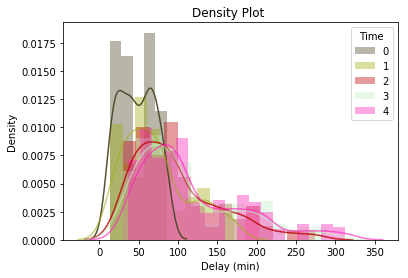

In [83]:
import random as rand
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

class Agent:
    def __init__(self, identification, productivity, wealth, preferences, age, health, alive, sex):
        self.identification = identification
        self.productivity = productivity
        self.wealth = wealth
        self.preferences = preferences
        self.age = age
        self.health = health
        self.alive = alive
        self.sex = sex

    def description(self):
        print("My id is", self.identification)
        print("My age is", self.age)
        print("My wealth is", self.wealth)
        
    def work(self):
        output = self.productivity*10
#         print("I made", output)
        return output


class Simulation:
    def __init__(self):
        self.alive = []
        self.dead = []
        self._id = 0
        self.year = 0
        self.taxrate = 0.1
        self.taxescollected = 0
        ubi = 0

    def average(self):
        totalwealth = 0
        for agent in self.alive:
            totalwealth += agent.wealth
        average = totalwealth/len(self.alive)
        return average
        
    def create_agent(self):
#         print("%%%%%%%%%%%%%%%%%%%%%%%%%%%Giving Birth...%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        self.alive.append(Agent(self._id, rand.randint(1,9), 0, "blue", 0, 0, True, True))
        self._id += 1

    def deaths(self):
#         print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%Starting deaths%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        for agent in self.alive.copy():
            if agent.age > 1:
                agent.alive = False
#                 print("Death of", agent.identification)
                self.taxescollected += agent.wealth
#                 print("Taxed the dead", self.taxescollected)
                self.dead.append(agent)
                self.alive.remove(agent)
#         print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%Ending deaths%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

                
    def incometaxation(self):
        for agent in self.alive:
            self.taxescollected += agent.work()*(self.taxrate)
#             print("I'm", agent.identification)
#             print("Taxes collected", self.taxescollected)
            agent.wealth += agent.work()*(1-self.taxrate)
#             print("My wealth is", agent.wealth)
    
    def ubi(self):
        ubi = self.taxescollected/int(len(self.alive))
        for agent in self.alive:
            agent.wealth += ubi
        self.taxescollected = 0
        
    
    def calculatebirths(self):
        babies = int(len(self.alive))
#         print("These are the babies",babies)
        return babies    

    def time_skip(self):
        self.deaths()
#         print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%SKIPPING TIME%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        self.prewealth = []
        self.postwealth = []
        self.year += 1
        for agent in self.alive:
            agent.age += 1
        for x in range(self.calculatebirths()):
            self.create_agent()

        self.incometaxation()
        for agent in simulation.alive: 
            self.prewealth.append(agent.wealth)
        self.ubi()
        for agent in simulation.alive: 
            self.postwealth.append(agent.wealth)
        print("The year is", self.year)
        print("Average", self.average())
        print("Max",np.max(self.postwealth))
        print("Min",np.min(self.postwealth))
#         print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%End of time skip%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")    



if __name__ == '__main__':
    simulation = Simulation()
    time = 5
    firstborn = 100
    for x in range(firstborn):
        simulation.create_agent()

    # Testing
    wealthdata = []
    for x in range(time):
        simulation.time_skip()
        wealthdata.append(simulation.postwealth)
    fig = plt.figure()
        
#     sns.distplot(wealthdata[1])
    for x in range(time):
        sns.distplot( wealthdata[x], color=(rand.uniform(0, 1),
                                            rand.uniform(0, 1),
                                            rand.uniform(0, 1),
                                            rand.uniform(0, 1)), label= x)
        
        
#     sns.distplot( wealthdata[1] , color="skyblue", label="t=0")
#     sns.distplot( wealthdata[2] , color="red", label="t=1")
#     sns.plt.legend()
#     sns.plt.show()

# Plot formatting
plt.legend(prop={'size': 10}, title = 'Time')
plt.title('Density Plot ')
plt.xlabel('Delay (min)')
plt.ylabel('Density')




